In [38]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
import os


from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [39]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
import time

In [40]:
api_key = 'CHQWOA1U8FQW6RFP'


In [41]:
ts = TimeSeries(key=api_key, output_format='pandas')
df, meta_data = ts.get_intraday(symbol='GOOG', interval = '5min', outputsize = 'full')
print(df)

                     1. open  2. high    3. low  4. close  5. volume
date                                                                
2023-03-08 20:00:00    94.57    94.70   94.5700     94.70      256.0
2023-03-08 19:55:00    94.59    94.65   94.5900     94.65     1032.0
2023-03-08 19:50:00    94.55    94.60   94.5499     94.60      778.0
2023-03-08 19:45:00    94.59    94.59   94.5500     94.55      503.0
2023-03-08 19:40:00    94.54    94.54   94.5400     94.54      505.0
...                      ...      ...       ...       ...        ...
2023-02-08 04:25:00   107.45   107.45  107.1100    107.11     3011.0
2023-02-08 04:20:00   107.45   107.45  107.4500    107.45      310.0
2023-02-08 04:15:00   107.45   107.45  107.4500    107.45      293.0
2023-02-08 04:10:00   107.45   107.45  107.3000    107.30      605.0
2023-02-08 04:05:00   107.72   107.72  107.2900    107.30     7350.0

[3467 rows x 5 columns]


In [42]:
# For the default date string index behavior
ts = TimeSeries(key=api_key,output_format='pandas', indexing_type='date')
ts
print(ts)

In [43]:
from alpha_vantage.timeseries import TimeSeries
from pprint import pprint
ts = TimeSeries(key=api_key, output_format='pandas')
data, meta_data = ts.get_intraday(symbol='GOOG',interval='5min', outputsize='full')
pprint(data)


                     1. open  2. high    3. low  4. close  5. volume
date                                                                
2023-03-08 20:00:00    94.57    94.70   94.5700     94.70      256.0
2023-03-08 19:55:00    94.59    94.65   94.5900     94.65     1032.0
2023-03-08 19:50:00    94.55    94.60   94.5499     94.60      778.0
2023-03-08 19:45:00    94.59    94.59   94.5500     94.55      503.0
2023-03-08 19:40:00    94.54    94.54   94.5400     94.54      505.0
...                      ...      ...       ...       ...        ...
2023-02-08 04:25:00   107.45   107.45  107.1100    107.11     3011.0
2023-02-08 04:20:00   107.45   107.45  107.4500    107.45      310.0
2023-02-08 04:15:00   107.45   107.45  107.4500    107.45      293.0
2023-02-08 04:10:00   107.45   107.45  107.3000    107.30      605.0
2023-02-08 04:05:00   107.72   107.72  107.2900    107.30     7350.0

[3467 rows x 5 columns]


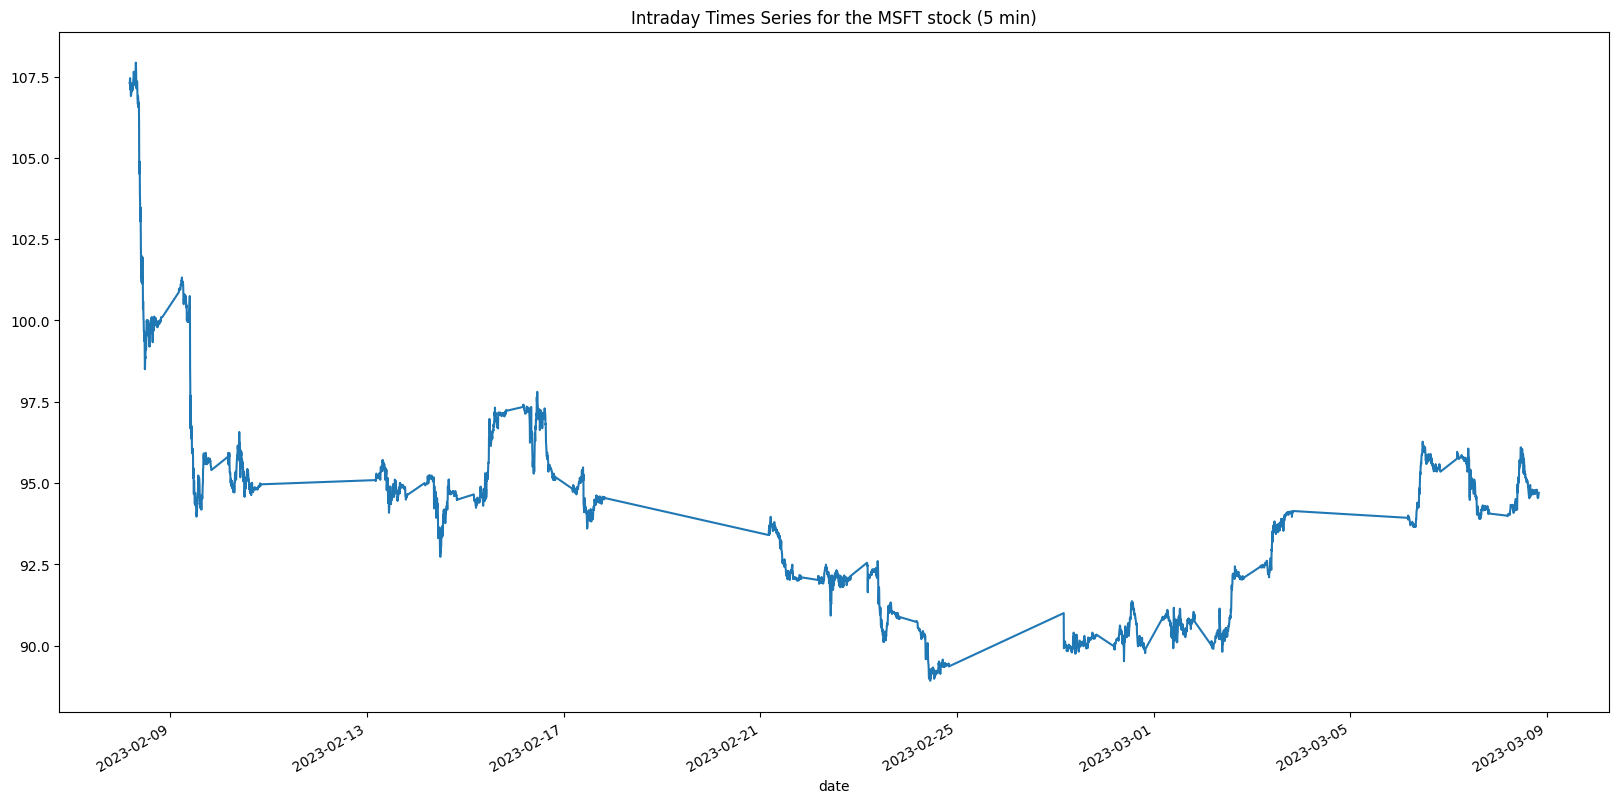

In [44]:
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt

ts = TimeSeries(key='IKGHGW5MQOYG9QOL', output_format='pandas')
df, meta_data = ts.get_intraday(symbol='GOOG',interval='5min', outputsize='full')
df['4. close'].plot()
plt.title('Intraday Times Series for the MSFT stock (5 min)')
plt.show()

In [45]:
i = 1
# while i==1:
#    df, meta_data = ts.get_intraday(symbol='MSFT', interval = '1min', outputsize = 'full')
#    df.to_csv("Dataset\Out.csv")
#    time.sleep(60)


In [46]:
df, meta_data = ts.get_intraday(symbol='GOOG', interval = '1min', outputsize = 'full')
df.to_csv("Dataset\Out.csv")

In [47]:
df = pd.read_csv("Dataset\Out.csv")
df.head()

,date,1. open,2. high,3. low,4. close,5. volume
0,2023-03-09 20:00:00,92.17,92.1700,92.14,92.14,505.0
1,2023-03-09 19:59:00,92.18,92.1800,92.15,92.15,997.0
2,2023-03-09 19:58:00,92.15,92.1500,92.15,92.15,1112.0
3,2023-03-09 19:57:00,92.16,92.2999,92.15,92.25,2549.0
4,2023-03-09 19:56:00,92.25,92.2500,92.24,92.24,724.0


In [48]:
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['date','4. close'])

for i in range(0,len(data)):
    new_dataset["date"][i]=df['date'][i]
    new_dataset["4. close"][i]=df["4. close"][i]

In [49]:
new_dataset.index=new_dataset.date
new_dataset.drop("date",axis=1,inplace=True)

final_dataset=new_dataset.values

train_data=final_dataset[0:987,:]
valid_data=final_dataset[987:,:]

scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_dataset)

x_train_data,y_train_data=[],[]

for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)

x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

<h2>Build and train the LSTM model</h2>

In [50]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))




lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)

inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)

927/927 - 27s - loss: 0.0033 - 27s/epoch - 29ms/step


In [51]:
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)



In [52]:
print(X_test.size)

340260


In [53]:
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
closing_price=lstm_model.predict(X_test)
closing_price=scaler.inverse_transform(closing_price)
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

178/178 [==============================] - 3s 16ms/step


In [54]:
lstm_model.save("saved_lstm_model.h5")


<h2>Visualize the predicted stock costs with actual stock costs</h2>

C:\Users\Nithin Kodipyaka\AppData\Local\Temp\ipykernel_18468\1343216786.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions']=predicted_closing_price


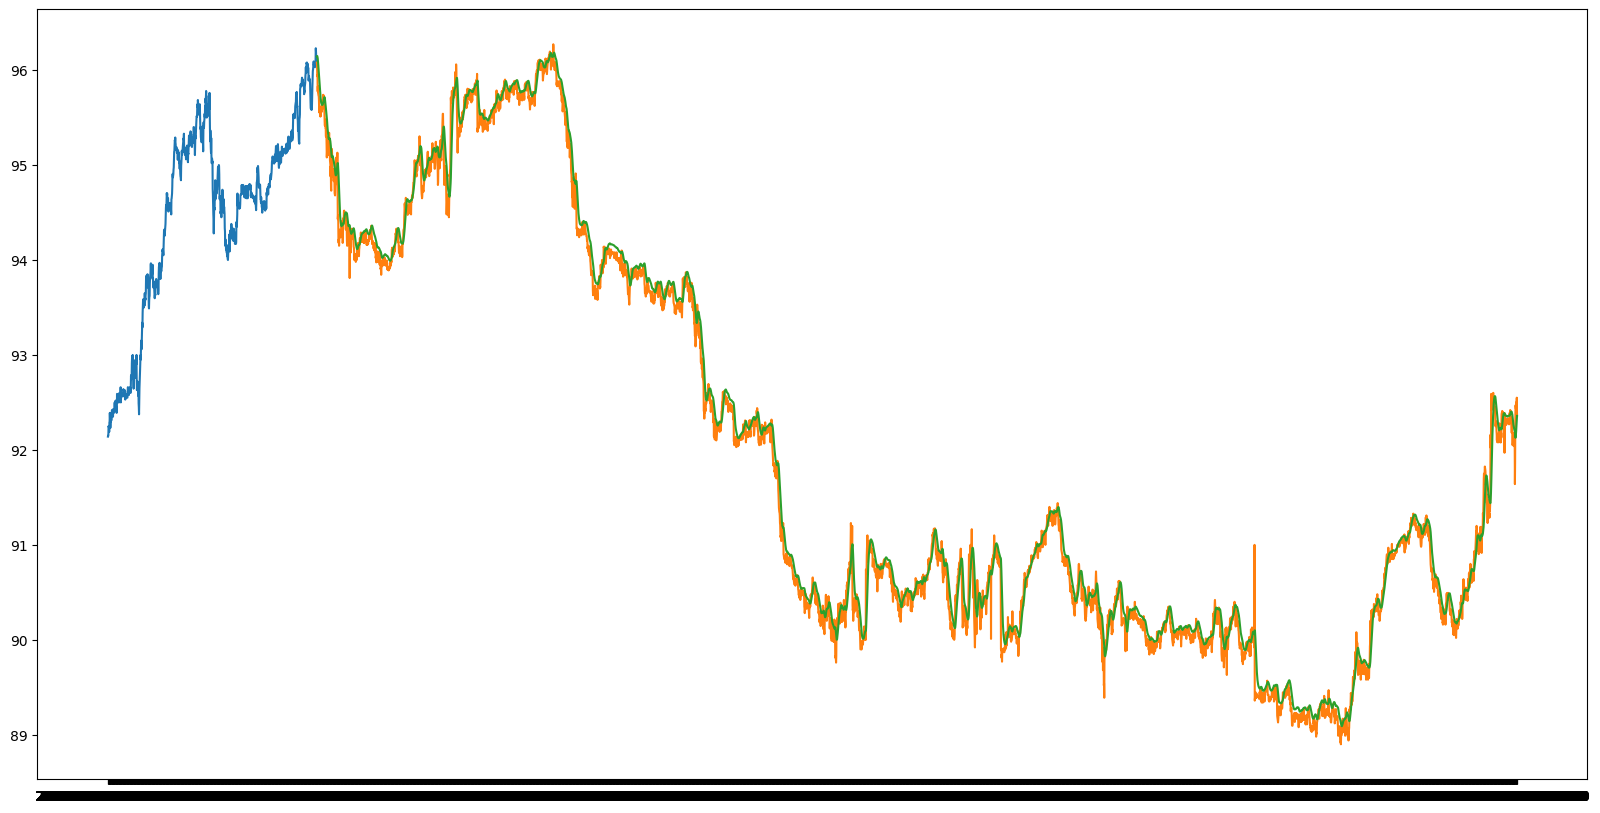

In [55]:
train_data=new_dataset[:987]
valid_data=new_dataset[987:]
valid_data['Predictions']=predicted_closing_price
plt.plot(train_data["4. close"])
plt.plot(valid_data[['4. close',"Predictions"]])